# Nibabel Basics Notebook
### *Learning how to load and view MRI scans*

## Import Libraries
We need nibabel for MRI files and matplotlib for plotting.

In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

## Upload an MRI File (.nii.gz)
Upload any NIfTI file.

In [ ]:
from google.colab import files
uploaded = files.upload()

## Load MRI File
Nibabel loads the 3D MRI volume as a NumPy array.

In [ ]:
file_path = list(uploaded.keys())[0]
mri = nib.load(file_path).get_fdata()
print('MRI Shape:', mri.shape)

## Visualize a Middle Slice
MRI is 3D. We view one slice at a time.

In [ ]:
slice_index = mri.shape[2] // 2
plt.imshow(mri[:, :, slice_index], cmap='gray')
plt.title(f'Slice {slice_index}')
plt.axis('off')

## Extract All Slices
Convert 3D MRI into 2D slices.

In [ ]:
slices = [mri[:, :, i] for i in range(mri.shape[2])]
len(slices)

## Normalize a Slice
Normalization improves contrast.

In [ ]:
norm_slice = (mri[:, :, slice_index] - np.min(mri)) / (np.max(mri) - np.min(mri))
plt.imshow(norm_slice, cmap='gray')
plt.title('Normalized Slice')
plt.axis('off')

## Resize Slice (Used in ML Preprocessing)

In [ ]:
import tensorflow as tf
resized = tf.image.resize(norm_slice[..., None], (128, 128))
plt.imshow(resized.numpy().squeeze(), cmap='gray')
plt.title('Resized Slice (128×128)')
plt.axis('off')

## **Exercises**
1. Load **another** MRI file and visualize 5 slices.
2. Write a function `plot_slices(volume, indices)` to plot given slice numbers.
3. Create a function to normalize **all** slices and return the new array.


(128, 128, 50)


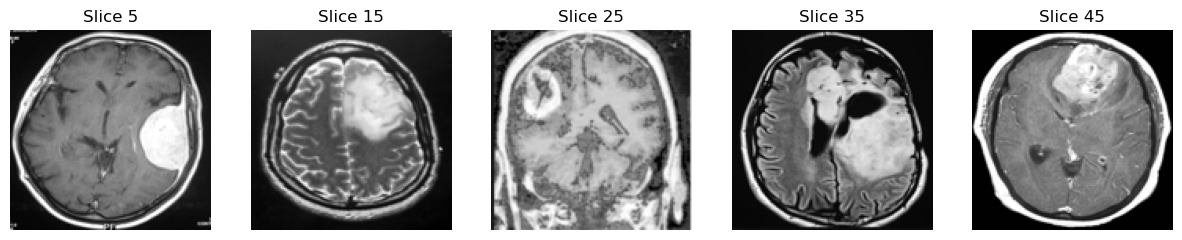

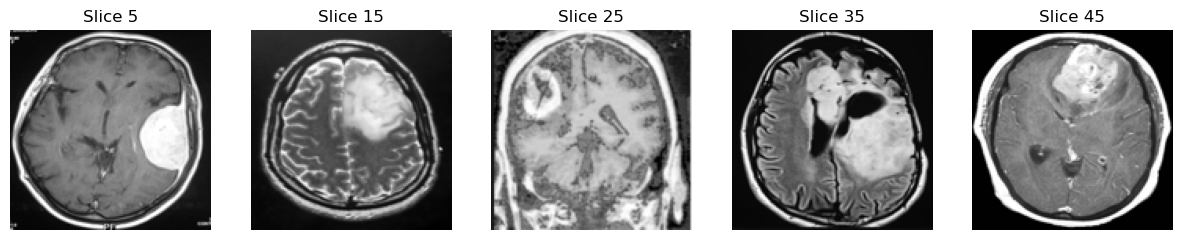

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

DATASET_PATH = "brain_tumor_dataset_1/yes"

slice_images = []
for fname in sorted(os.listdir(DATASET_PATH))[:50]:
    img = Image.open(os.path.join(DATASET_PATH, fname)).convert("L")
    img = img.resize((128, 128))
    img = np.array(img)
    slice_images.append(img)

mri_volume = np.stack(slice_images, axis=2)

print(mri_volume.shape)

def plot_slices(volume, indices):
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(indices):
        plt.subplot(1, len(indices), i + 1)
        plt.imshow(volume[:, :, idx], cmap="gray")
        plt.title(f"Slice {idx}")
        plt.axis("off")
    plt.show()

mid = mri_volume.shape[2] // 2
plot_slices(mri_volume, [mid-20, mid-10, mid, mid+10, mid+20])

def normalize_volume(volume):
    return (volume - volume.min()) / (volume.max() - volume.min())

normalized_mri = normalize_volume(mri_volume)

plot_slices(normalized_mri, [mid-20, mid-10, mid, mid+10, mid+20])
